## 第一次作業
### 引入模組

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

### 讀取資料並簡單檢視

這是 Trouser


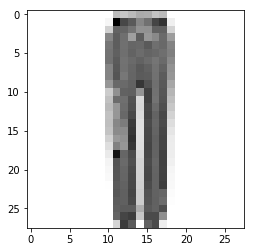

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

n = 1000
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

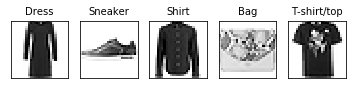

In [4]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

### 檢視資料型態

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

### 檢視第一筆資料的矩陣

In [7]:
x_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,  67,   0,
          0,   0,   0,  50,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8, 120, 209, 226, 247, 237,
        255, 255, 255, 247, 238, 235, 172,  72,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 137, 239, 252, 243, 234, 229, 238,
        244, 246, 240, 230, 232, 239, 248, 251, 194,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 102, 255, 231, 228, 227, 228, 233, 230,
        230, 229, 228, 232, 232, 231, 227, 224, 252, 179,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 233, 241, 229, 231, 255, 255, 238, 231,
        227, 238, 246, 228, 230, 227, 234, 235, 229, 241,  20,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 248, 241, 231, 255, 149,  47, 252, 228,
        255, 242, 216, 238, 232, 255, 228, 220, 234, 250,  54,   0,   0,
          0,   0],
       [  

### 色彩範圍為0~255
### 將矩陣轉範圍為0-1 將矩陣除以255

In [8]:
x_train = x_train/255
x_test = x_test/255

### 使用reshape將矩陣拉平

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

### activation = relu
### layer 1: 200 neurons
### layer 2: 100 neurons
### output layer: 10 neurons

In [10]:
model = Sequential()
model.add(Dense(200, input_dim=784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


### 將Loss函數由"MSE"改成"sparse_categorical_crossentropy"

### epochs 改成 30

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_train, y_train, batch_size=100, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 17us/sample - loss: 1.0142 - accuracy: 0.6833
Epoch 2/30
60000/60000 [==============================] - 1s 15us/sample - loss: 0.6027 - accuracy: 0.8015
Epoch 3/30
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5284 - accuracy: 0.8213
Epoch 4/30
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4920 - accuracy: 0.8317
Epoch 5/30
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4702 - accuracy: 0.8383
Epoch 6/30
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4530 - accuracy: 0.8440
Epoch 7/30
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4412 - accuracy: 0.8475
Epoch 8/30
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4302 - accuracy: 0.8504
Epoch 9/30
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4199 - accuracy: 0.8536
Epoch 10/30
60

In [13]:
result = model.predict_classes(x_test)

### 先看一下模型對於測試資料集的預測準確率

In [14]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.3736 - accuracy: 0.8665


In [15]:
loss, acc = score
print('預測準確率為：',acc)

預測準確率為： 0.8665


### 檢視預測結果與圖片是否相符

第幾個:100
這是 Dress
The prediction is right.


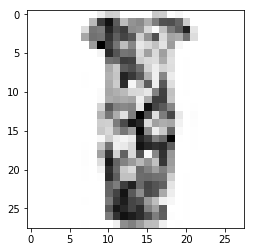

In [16]:
n = eval(input("第幾個:"))
print('這是', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys')
if result[n] == y_test[n]:
    print("The prediction is right.")
else:
    print("The prediction is wrong.")

### 參考眾多同學都有切割數據集來做驗證以防止過度擬合，我自己也試了一下
### 驗證集大小為60000比測試集中的45001筆至60000筆

In [17]:
x_training = x_train[0:45000, :]
y_training = y_train[0:45000]
x_val = x_train[45001:60000, :]
y_val = y_train[45001:60000]

### 加入驗證集後再次跑模型

In [18]:
train_history2 = model.fit(x_training, y_training, validation_data=(x_val, y_val), batch_size=100, epochs=30)

Train on 45000 samples, validate on 14999 samples
Epoch 1/30
45000/45000 [==============================] - 1s 18us/sample - loss: 0.3165 - accuracy: 0.8886 - val_loss: 0.3231 - val_accuracy: 0.8857
Epoch 2/30
45000/45000 [==============================] - 1s 17us/sample - loss: 0.3140 - accuracy: 0.8897 - val_loss: 0.3230 - val_accuracy: 0.8844
Epoch 3/30
45000/45000 [==============================] - 1s 17us/sample - loss: 0.3115 - accuracy: 0.8904 - val_loss: 0.3267 - val_accuracy: 0.8825
Epoch 4/30
45000/45000 [==============================] - 1s 18us/sample - loss: 0.3080 - accuracy: 0.8915 - val_loss: 0.3156 - val_accuracy: 0.8877
Epoch 5/30
45000/45000 [==============================] - 1s 18us/sample - loss: 0.3054 - accuracy: 0.8922 - val_loss: 0.3203 - val_accuracy: 0.8847
Epoch 6/30
45000/45000 [==============================] - 1s 18us/sample - loss: 0.3036 - accuracy: 0.8929 - val_loss: 0.3198 - val_accuracy: 0.8863
Epoch 7/30
45000/45000 [==============================] 

### 再次觀察加入驗證集後的模型對於預測測試集的準確度

In [19]:
score1 = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3525 - accuracy: 0.8746


In [20]:
loss1, acc1 = score1
print('預測準確率為：',acc1)

預測準確率為： 0.8746


### 比較測試集的準確率

In [22]:
print('預測準確率為：',acc)
print('預測準確率(加入驗證集)為：',acc1)

預測準確率為： 0.8665
預測準確率(加入驗證集)為： 0.8746


In [23]:
print('預測偏誤率為：',loss)
print('預測偏誤率(加入驗證集)為：',loss1)

預測準確率為： 0.37356467921733855
預測準確率(加入驗證集)為： 0.35248226721286774


### 可以發現切出驗證集後，對於準確率有1%左右的提升，在偏誤率也有2%左右的下降。

### 透過圖表來看測試集準確度與驗證集準確度的關係

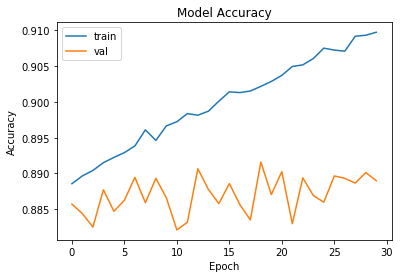

In [24]:
plt.plot(train_history2.history['accuracy'])
plt.plot(train_history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

### 透過圖表來看測試集錯誤率與驗證集錯誤率的關係

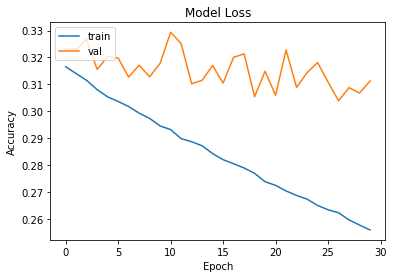

In [25]:
plt.plot(train_history2.history['loss'])
plt.plot(train_history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

### 透過混淆矩陣來看模型預測情況，矩陣從左上到右下的對角線為預測正確的數目

In [26]:
from sklearn import metrics
print('Confusion Matrix\n',metrics.confusion_matrix(result, y_test))

Confusion Matrix
 [[855   4  22  32   0   0 169   0   6   0]
 [  1 967   5  13   1   0   3   0   2   0]
 [ 11   0 723   8  63   0  83   0   5   0]
 [ 33  20  12 875  27   1  30   0  11   0]
 [  5   5 163  41 851   0 103   0   5   0]
 [  3   0   0   0   0 947   0  25   3   8]
 [ 83   3  71  26  57   0 597   0   9   0]
 [  0   0   0   0   0  37   0 955   7  48]
 [  9   1   4   5   1   1  15   0 952   1]
 [  0   0   0   0   0  14   0  20   0 943]]


### 參考資料: 損失函數介紹 
##### https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E4%BB%8B%E7%B4%B9-%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8-loss-function-2dcac5ebb6cb

##### https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-ml-note-overfitting-%E9%81%8E%E5%BA%A6%E5%AD%B8%E7%BF%92-6196902481bb